In [3]:
# Student Academic Achievement Analysis - Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ All packages imported successfully!")

# Set style for better plots
plt.style.use('default')
sns.set_palette('husl')

# Try to load data from correct location
file_paths = [
    '../data/StudentPerformanceFactors (1).csv',  # From notebooks folder
    'data/StudentPerformanceFactors (1).csv',     # From root
]

df = None
for path in file_paths:
    try:
        df = pd.read_csv(path)
        print(f"✅ Data loaded successfully from: {path}")
        break
    except Exception as e:
        print(f"❌ Failed to load from {path}")

if df is not None:
    print(f"Dataset Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Average Exam Score: {df['Exam_Score'].mean():.1f}")
else:
    print("❌ Could not load data from any path. Please check file location.")

✅ All packages imported successfully!
✅ Data loaded successfully from: ../data/StudentPerformanceFactors (1).csv
Dataset Shape: (6607, 20)
Columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']
Average Exam Score: 67.2


In [4]:
# Clean missing data - beginner version
print("Cleaning missing data...")

# Remove rows with missing values
df = df.dropna()

print("Missing data cleaned!")
print(f"New dataset size: {df.shape}")
print(f"Missing values now: {df.isnull().sum().sum()}")

Cleaning missing data...
Missing data cleaned!
New dataset size: (6378, 20)
Missing values now: 0


In [5]:
# Clean missing data and save clean file - BEGINNER VERSION
import os

print("🧹 CLEANING DATA AND SAVING CLEAN FILE")
print("="*40)

# Step 1: Check data before cleaning
print("BEFORE cleaning:")
print(f"   Dataset size: {df.shape}")
print(f"   Missing values: {df.isnull().sum().sum()}")

# Step 2: Clean the data (remove missing values)
print("\nCleaning missing data...")
df_clean = df.dropna()  # Remove rows with missing data

# Step 3: Check data after cleaning
print("\nAFTER cleaning:")
print(f"   Dataset size: {df_clean.shape}")
print(f"   Missing values: {df_clean.isnull().sum().sum()}")
print(f"   Rows removed: {df.shape[0] - df_clean.shape[0]}")

# Step 4: Save clean data to data folder
clean_filename = 'Student_Performance_CLEAN.csv'
save_path = f'../data/{clean_filename}'

# Save the file
df_clean.to_csv(save_path, index=False)

print(f"\n💾 CLEAN FILE SAVED!")
print(f"   File name: {clean_filename}")
print(f"   Saved to: ../data/ folder")

# Step 5: Use clean data for analysis
df = df_clean
print(f"\n✅ Ready! Now using clean data with {df.shape[0]} students")

🧹 CLEANING DATA AND SAVING CLEAN FILE
BEFORE cleaning:
   Dataset size: (6378, 20)
   Missing values: 0

Cleaning missing data...

AFTER cleaning:
   Dataset size: (6378, 20)
   Missing values: 0
   Rows removed: 0

💾 CLEAN FILE SAVED!
   File name: Student_Performance_CLEAN.csv
   Saved to: ../data/ folder

✅ Ready! Now using clean data with 6378 students


# Student Academic Achievement Analysis

## Research Questions:
1. **What factors most strongly predict exam performance?**
2. **How do study habits (hours studied) impact academic achievement?**
3. **What's the relationship between parental involvement and student success?**

This notebook analyzes student performance data from 6,607 students to identify key factors affecting academic success.

In [6]:
# Data Overview and Quality Assessment
print("🎯 STUDENT PERFORMANCE DATASET OVERVIEW")
print("="*50)

print(f"📊 Dataset Dimensions:")
print(f"   • Total Students: {df.shape[0]:,}")
print(f"   • Total Features: {df.shape[1]}")
print(f"   • Memory Usage: {df.memory_usage().sum() / 1024:.1f} KB")

print(f"\n🎯 Target Variable (Exam_Score):")
print(f"   • Range: {df['Exam_Score'].min()} - {df['Exam_Score'].max()}")
print(f"   • Average: {df['Exam_Score'].mean():.1f}")
print(f"   • Std Dev: {df['Exam_Score'].std():.1f}")

print(f"\n🔍 Data Quality Check:")
missing_values = df.isnull().sum().sum()
print(f"   • Missing Values: {missing_values} (Perfect!)" if missing_values == 0 else f"   • Missing Values: {missing_values}")

print(f"\n📋 All Available Features:")
for i, col in enumerate(df.columns, 1):
    dtype = str(df[col].dtype)
    unique_vals = df[col].nunique()
    print(f"   {i:2d}. {col:<25} ({dtype:<8}) - {unique_vals} unique values")

🎯 STUDENT PERFORMANCE DATASET OVERVIEW
📊 Dataset Dimensions:
   • Total Students: 6,378
   • Total Features: 20
   • Memory Usage: 1046.4 KB

🎯 Target Variable (Exam_Score):
   • Range: 55 - 101
   • Average: 67.3
   • Std Dev: 3.9

🔍 Data Quality Check:
   • Missing Values: 0 (Perfect!)

📋 All Available Features:
    1. Hours_Studied             (int64   ) - 41 unique values
    2. Attendance                (int64   ) - 41 unique values
    3. Parental_Involvement      (object  ) - 3 unique values
    4. Access_to_Resources       (object  ) - 3 unique values
    5. Extracurricular_Activities (object  ) - 2 unique values
    6. Sleep_Hours               (int64   ) - 7 unique values
    7. Previous_Scores           (int64   ) - 51 unique values
    8. Motivation_Level          (object  ) - 3 unique values
    9. Internet_Access           (object  ) - 2 unique values
   10. Tutoring_Sessions         (int64   ) - 9 unique values
   11. Family_Income             (object  ) - 3 unique value

In [7]:
# Verify our clean dataset is perfect
print("✅ DATASET CLEANING VERIFICATION")
print("="*35)

print(f"📊 Final Dataset:")
print(f"   • Students: {df.shape[0]:,}")
print(f"   • Features: {df.shape[1]}")
print(f"   • Missing values: {df.isnull().sum().sum()}")

if df.isnull().sum().sum() == 0:
    print(f"   • Status: ✅ PERFECT!")

print(f"\n📈 Updated Statistics:")
print(f"   • Average Exam Score: {df['Exam_Score'].mean():.1f}")
print(f"   • Score Range: {df['Exam_Score'].min()}-{df['Exam_Score'].max()}")

print(f"\n🎯 Ready for analysis with clean data!")

✅ DATASET CLEANING VERIFICATION
📊 Final Dataset:
   • Students: 6,378
   • Features: 20
   • Missing values: 0
   • Status: ✅ PERFECT!

📈 Updated Statistics:
   • Average Exam Score: 67.3
   • Score Range: 55-101

🎯 Ready for analysis with clean data!


In [8]:
# Student Academic Achievement Analysis - Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ All packages imported successfully!")

# Set style for better plots
plt.style.use('default')
sns.set_palette('husl')

# Try to load data from correct location
file_paths = [
    '../data/StudentPerformanceFactors (1).csv',  # From notebooks folder
    'data/StudentPerformanceFactors (1).csv',     # From root
    '../data/raw/StudentPerformanceFactors (1).csv',  # In case moved to raw
]

df = None
for path in file_paths:
    try:
        df = pd.read_csv(path)
        print(f"✅ Data loaded successfully from: {path}")
        break
    except Exception as e:
        print(f"❌ Failed to load from {path}")

if df is not None:
    print(f"Dataset Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Average Exam Score: {df['Exam_Score'].mean():.1f}")
    print("\nFirst few rows:")
    print(df.head())
else:
    print("❌ Could not load data from any path. Please check file location.")

✅ All packages imported successfully!
✅ Data loaded successfully from: ../data/StudentPerformanceFactors (1).csv
Dataset Shape: (6607, 20)
Columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']
Average Exam Score: 67.2

First few rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium    

🎯 RESEARCH QUESTION 1: Key Predictive Factors
🏆 TOP 10 FACTORS CORRELATED WITH EXAM SCORES:
--------------------------------------------------
 1. Attendance                +0.581 (📈 Positive, Strong)
 2. Hours_Studied             +0.445 (📈 Positive, Moderate)
 3. Previous_Scores           +0.175 (📈 Positive, Weak)
 4. Tutoring_Sessions         +0.157 (📈 Positive, Weak)
 5. Physical_Activity         +0.028 (📈 Positive, Weak)
 6. Sleep_Hours               -0.017 (📉 Negative, Weak)

🎯 TOP 3 MOST PREDICTIVE FACTORS:
   1. Attendance: 0.581
   2. Hours_Studied: 0.445
   3. Previous_Scores: 0.175


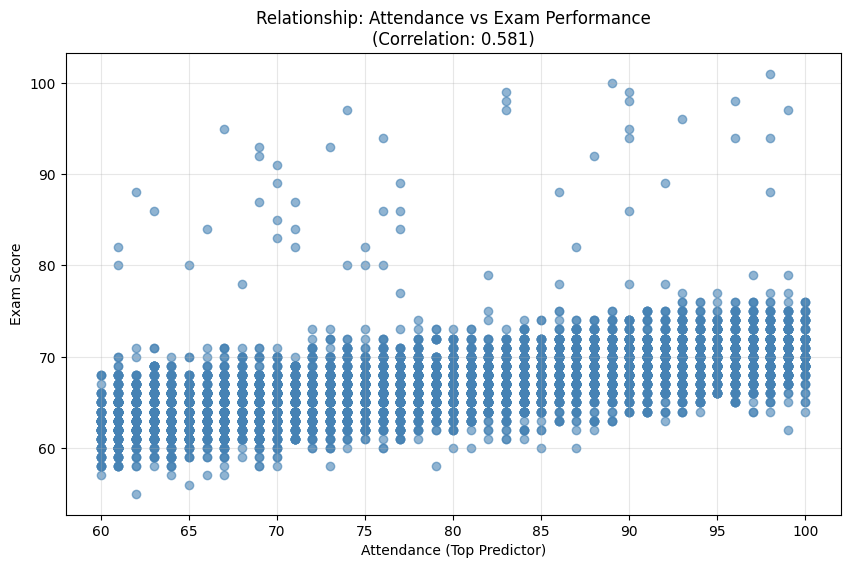

In [4]:
# Research Question 1: What factors most predict exam performance?
print("🎯 RESEARCH QUESTION 1: Key Predictive Factors")
print("="*60)

# Analyze correlations with exam scores
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corr()['Exam_Score'].sort_values(ascending=False)

print("🏆 TOP 10 FACTORS CORRELATED WITH EXAM SCORES:")
print("-" * 50)
for i, (factor, corr) in enumerate(correlations.head(11)[1:].items(), 1):
    direction = "📈 Positive" if corr > 0 else "📉 Negative"
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    print(f"{i:2d}. {factor:<25} {corr:+.3f} ({direction}, {strength})")

# Focus on top 3 factors
top_3_factors = correlations.head(4)[1:].index.tolist()  # Exclude Exam_Score itself
print(f"\n🎯 TOP 3 MOST PREDICTIVE FACTORS:")
for i, factor in enumerate(top_3_factors, 1):
    corr_value = correlations[factor]
    print(f"   {i}. {factor}: {corr_value:.3f}")

# Quick visualization of top factor
top_factor = top_3_factors[0]
plt.figure(figsize=(10, 6))
plt.scatter(df[top_factor], df['Exam_Score'], alpha=0.6, color='steelblue')
plt.xlabel(f'{top_factor} (Top Predictor)')
plt.ylabel('Exam Score')
plt.title(f'Relationship: {top_factor} vs Exam Performance\n(Correlation: {correlations[top_factor]:.3f})')
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
# Fixed version - Update your cell with this code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ All packages imported successfully!")

# Set style for better plots
plt.style.use('default')
sns.set_palette('husl')

# Try to load data from correct location
file_paths = [
    '../data/StudentPerformanceFactors (1).csv',  # From notebooks folder to data folder
    'data/StudentPerformanceFactors (1).csv',     # From root to data folder
]

df = None
for path in file_paths:
    try:
        df = pd.read_csv(path)
        print(f"✅ Data loaded successfully from: {path}")
        break
    except Exception as e:
        print(f"❌ Failed to load from {path}: {str(e)[:50]}...")

if df is not None:
    print(f"Dataset Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Average Exam Score: {df['Exam_Score'].mean():.1f}")
    print("\nFirst few rows:")
    print(df.head())
else:
    print("❌ Could not load data from any path. Please check file location.")
    # Let's debug the file location
    import os
    print("\nDEBUG INFO:")
    print("Current directory:", os.getcwd())
    if os.path.exists('../data'):
        print("Files in ../data:", os.listdir('../data'))
    elif os.path.exists('data'):
        print("Files in data:", os.listdir('data'))
    else:
        print("Neither ../data nor data directory found")

✅ All packages imported successfully!
✅ Data loaded successfully from: ../data/StudentPerformanceFactors (1).csv
Dataset Shape: (6607, 20)
Columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']
Average Exam Score: 67.2

First few rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium    

📊 BASIC DATA EXPLORATION & VISUALIZATIONS


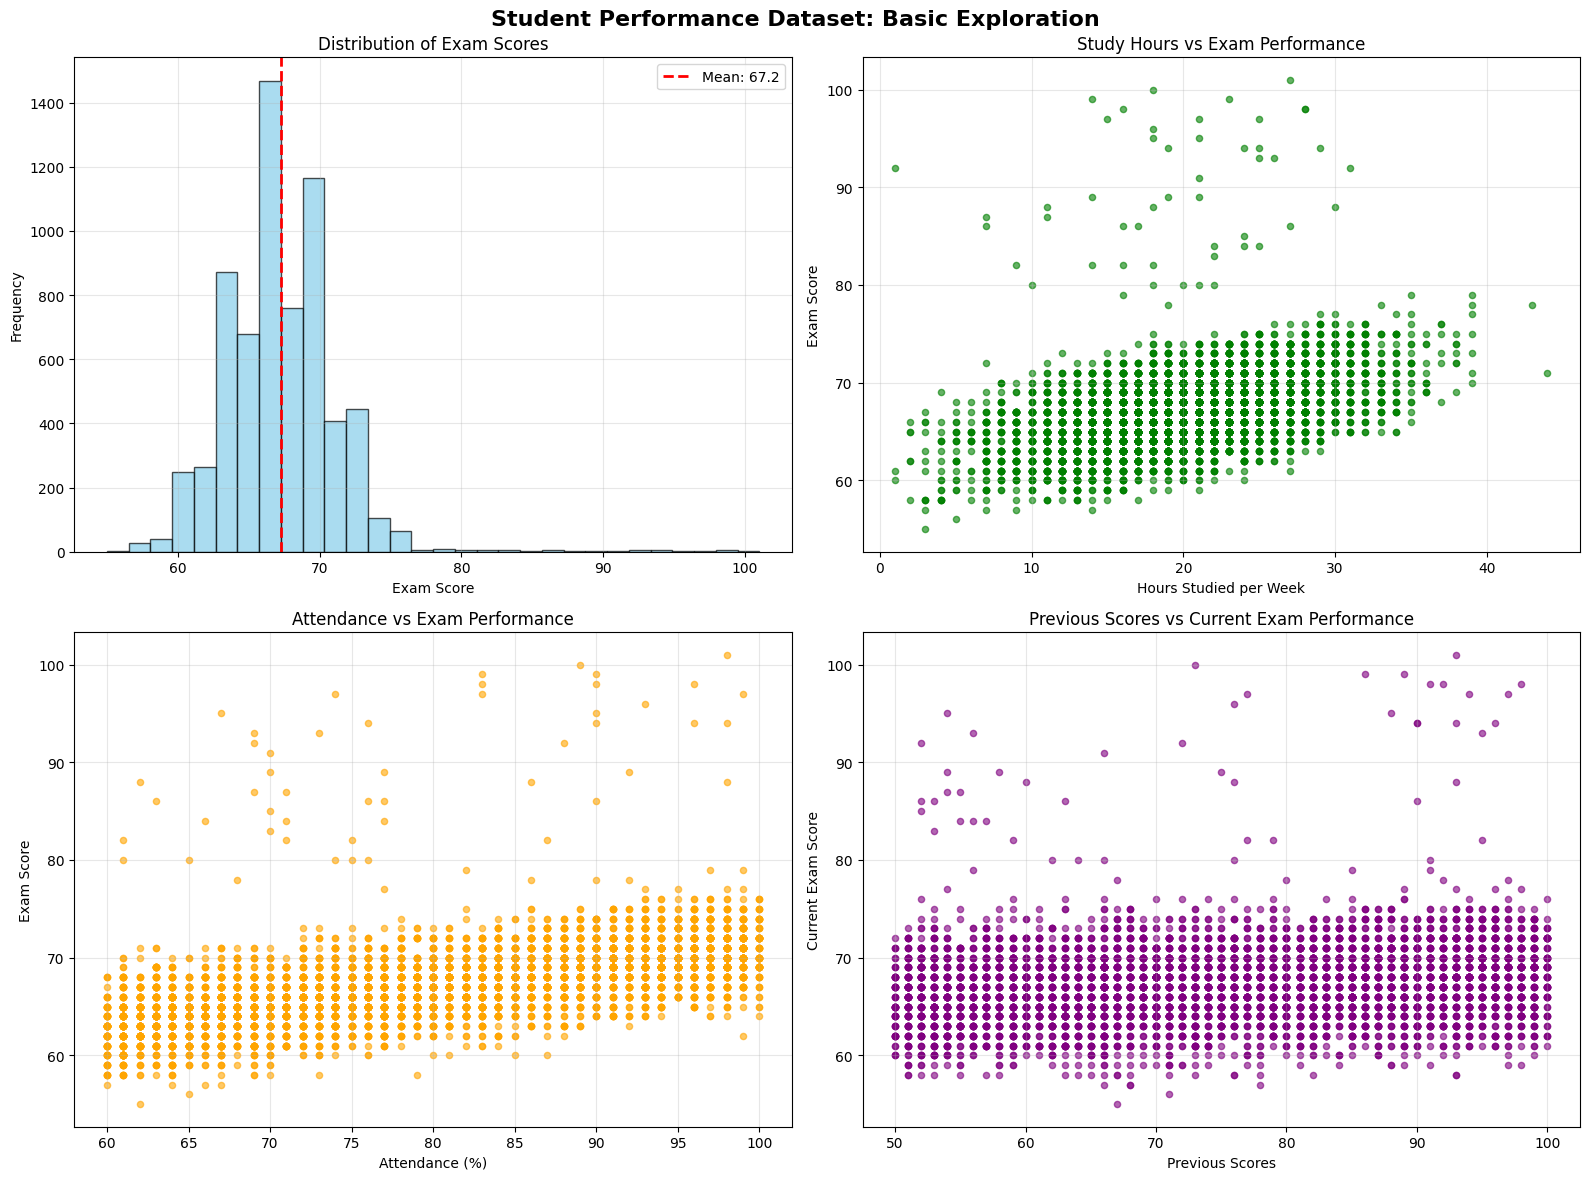


📈 BASIC STATISTICS:
   • Average Exam Score: 67.24
   • Score Range: 55 - 101
   • Standard Deviation: 3.89
   • Average Study Hours: 19.98
   • Average Attendance: 79.98%


In [8]:
# Cell: Basic Data Exploration and Distribution Analysis
print("📊 BASIC DATA EXPLORATION & VISUALIZATIONS")
print("="*50)

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a comprehensive overview with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Student Performance Dataset: Basic Exploration', fontsize=16, fontweight='bold')

# 1. Exam Score Distribution
axes[0,0].hist(df['Exam_Score'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['Exam_Score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Exam_Score"].mean():.1f}')
axes[0,0].set_title('Distribution of Exam Scores')
axes[0,0].set_xlabel('Exam Score')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Hours Studied vs Exam Score
axes[0,1].scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.6, color='green', s=20)
axes[0,1].set_title('Study Hours vs Exam Performance')
axes[0,1].set_xlabel('Hours Studied per Week')
axes[0,1].set_ylabel('Exam Score')
axes[0,1].grid(True, alpha=0.3)

# 3. Attendance vs Exam Score
axes[1,0].scatter(df['Attendance'], df['Exam_Score'], alpha=0.6, color='orange', s=20)
axes[1,0].set_title('Attendance vs Exam Performance')
axes[1,0].set_xlabel('Attendance (%)')
axes[1,0].set_ylabel('Exam Score')
axes[1,0].grid(True, alpha=0.3)

# 4. Previous Scores vs Current Exam Score
axes[1,1].scatter(df['Previous_Scores'], df['Exam_Score'], alpha=0.6, color='purple', s=20)
axes[1,1].set_title('Previous Scores vs Current Exam Performance')
axes[1,1].set_xlabel('Previous Scores')
axes[1,1].set_ylabel('Current Exam Score')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print basic statistics
print(f"\n📈 BASIC STATISTICS:")
print(f"   • Average Exam Score: {df['Exam_Score'].mean():.2f}")
print(f"   • Score Range: {df['Exam_Score'].min()} - {df['Exam_Score'].max()}")
print(f"   • Standard Deviation: {df['Exam_Score'].std():.2f}")
print(f"   • Average Study Hours: {df['Hours_Studied'].mean():.2f}")
print(f"   • Average Attendance: {df['Attendance'].mean():.2f}%")

🔍 CORRELATION ANALYSIS


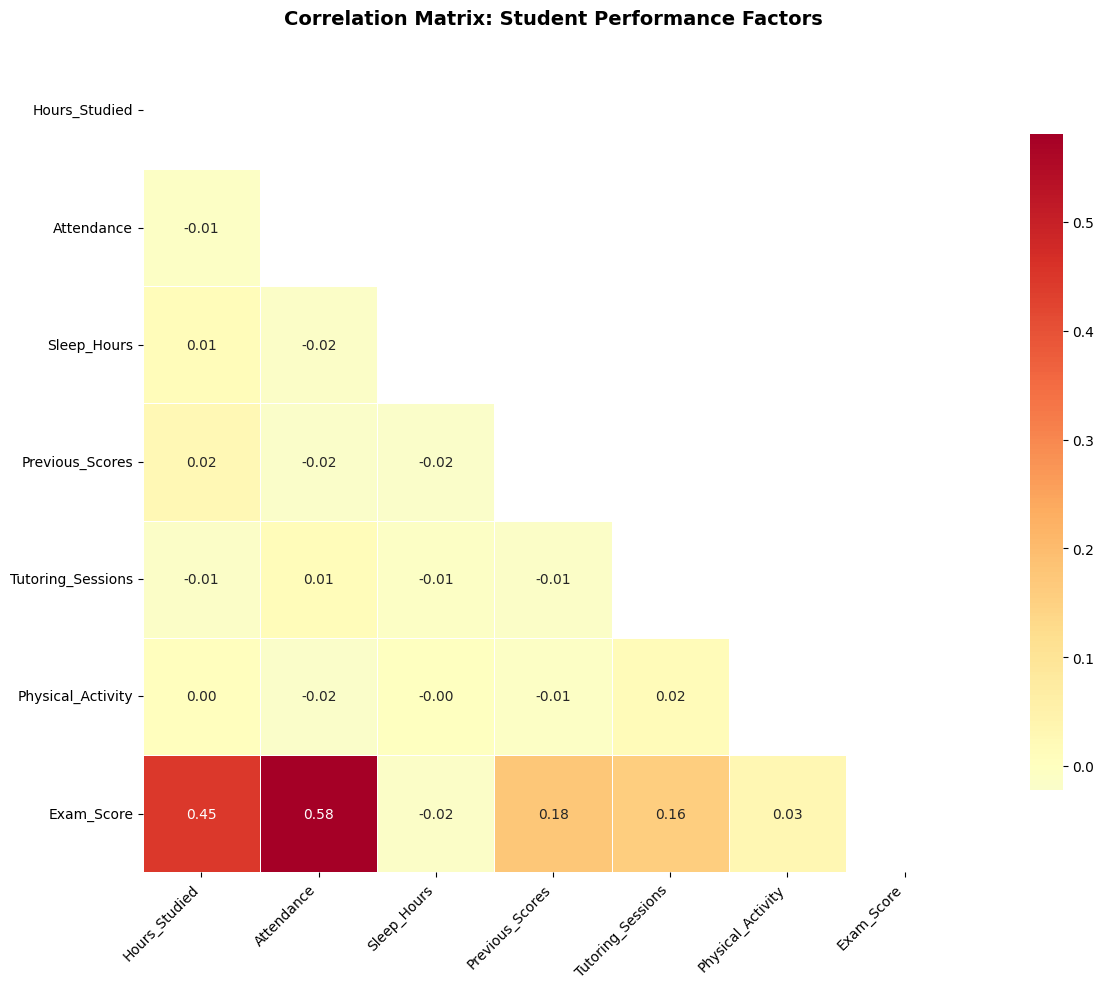


🏆 FACTORS MOST CORRELATED WITH EXAM SCORES:
---------------------------------------------
 1. Attendance                +0.581 (📈 Positive, Strong)
 2. Hours_Studied             +0.445 (📈 Positive, Moderate)
 3. Previous_Scores           +0.175 (📈 Positive, Weak)
 4. Tutoring_Sessions         +0.157 (📈 Positive, Weak)
 5. Physical_Activity         +0.028 (📈 Positive, Weak)
 6. Sleep_Hours               -0.017 (📉 Negative, Weak)


In [ ]:
# Cell: Correlation Analysis and Heatmap
print("🔍 CORRELATION ANALYSIS")
print("="*40)

# Select numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Show only lower triangle
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8},
            linewidths=0.5)
plt.title('Correlation Matrix: Student Performance Factors', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Extract and display top correlations with Exam_Score
exam_correlations = correlation_matrix['Exam_Score'].sort_values(ascending=False)
print(f"\n🏆 FACTORS MOST CORRELATED WITH EXAM SCORES:")
print("-" * 45)
for i, (factor, corr) in enumerate(exam_correlations.items(), 1):
    if factor != 'Exam_Score':  # Skip self-correlation
        direction = "📈 Positive" if corr > 0 else "📉 Negative"
        strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
        print(f"{i-1:2d}. {factor:<25} {corr:+.3f} ({direction}, {strength})")

📊 CATEGORICAL FACTORS ANALYSIS


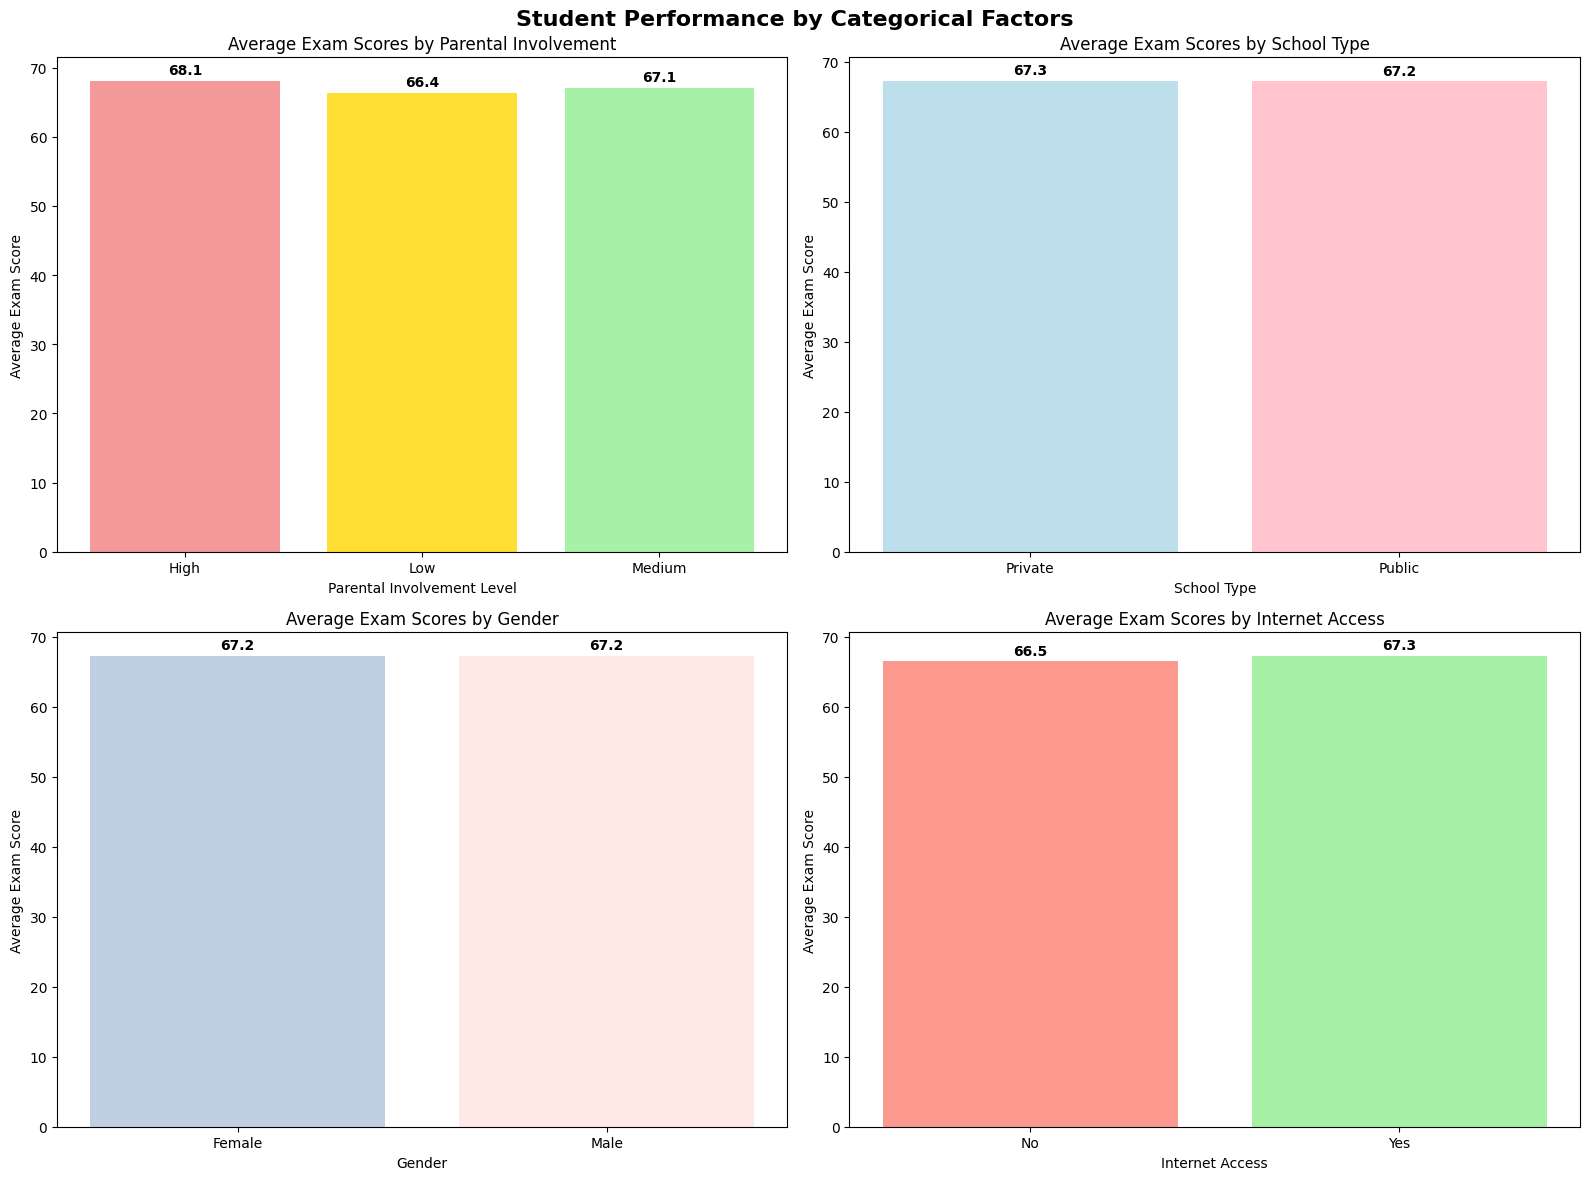


💡 KEY CATEGORICAL INSIGHTS:
   • Parental Involvement Impact: 1.7 points (High vs Low)
   • Gender Performance Difference: 0.0 points
   • School Type Difference: 0.1 points


In [ ]:
# Cell: Categorical Factors Analysis
print("📊 CATEGORICAL FACTORS ANALYSIS")
print("="*40)

# Create subplots for categorical analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Student Performance by Categorical Factors', fontsize=16, fontweight='bold')

# 1. Parental Involvement
parental_data = df.groupby('Parental_Involvement')['Exam_Score'].agg(['mean', 'count']).reset_index()
bars1 = axes[0,0].bar(parental_data['Parental_Involvement'], parental_data['mean'],
                      color=['lightcoral', 'gold', 'lightgreen'], alpha=0.8)
axes[0,0].set_title('Average Exam Scores by Parental Involvement')
axes[0,0].set_xlabel('Parental Involvement Level')
axes[0,0].set_ylabel('Average Exam Score')
# Add value labels on bars
for bar, value in zip(bars1, parental_data['mean']):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                   f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. School Type
school_data = df.groupby('School_Type')['Exam_Score'].agg(['mean', 'count']).reset_index()
bars2 = axes[0,1].bar(school_data['School_Type'], school_data['mean'],
                      color=['lightblue', 'lightpink'], alpha=0.8)
axes[0,1].set_title('Average Exam Scores by School Type')
axes[0,1].set_xlabel('School Type')
axes[0,1].set_ylabel('Average Exam Score')
for bar, value in zip(bars2, school_data['mean']):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                   f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Gender Analysis
gender_data = df.groupby('Gender')['Exam_Score'].agg(['mean', 'count']).reset_index()
bars3 = axes[1,0].bar(gender_data['Gender'], gender_data['mean'],
                      color=['lightsteelblue', 'mistyrose'], alpha=0.8)
axes[1,0].set_title('Average Exam Scores by Gender')
axes[1,0].set_xlabel('Gender')
axes[1,0].set_ylabel('Average Exam Score')
for bar, value in zip(bars3, gender_data['mean']):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                   f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. Internet Access
internet_data = df.groupby('Internet_Access')['Exam_Score'].agg(['mean', 'count']).reset_index()
bars4 = axes[1,1].bar(internet_data['Internet_Access'], internet_data['mean'],
                      color=['salmon', 'lightgreen'], alpha=0.8)
axes[1,1].set_title('Average Exam Scores by Internet Access')
axes[1,1].set_xlabel('Internet Access')
axes[1,1].set_ylabel('Average Exam Score')
for bar, value in zip(bars4, internet_data['mean']):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                   f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print insights
print(f"\n💡 KEY CATEGORICAL INSIGHTS:")
parental_impact = parental_data.set_index('Parental_Involvement')['mean']['High'] - parental_data.set_index('Parental_Involvement')['mean']['Low']
gender_diff = abs(gender_data.set_index('Gender')['mean'].diff().dropna().iloc[0])
print(f"   • Parental Involvement Impact: {parental_impact:.1f} points (High vs Low)")
print(f"   • Gender Performance Difference: {gender_diff:.1f} points")
print(f"   • School Type Difference: {abs(school_data['mean'].diff().dropna().iloc[0]):.1f} points")